<a href="https://colab.research.google.com/github/abduyea/AD325-DS/blob/main/image_classification_with_neural_network/image_classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abdulfetah Adem

#Image Classsiication with Dense Neural network

##README

### How to Run

Sign in with your Google account.

Open the notebook in Google Colab.

Go to Runtime → Change runtime type →CPU or  GPU (recommended).

 Run all or run each cell from top to bottom.

In [3]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential


In [4]:
# reproducibility
SEED = 42
np.random.seed(SEED)
import random
random.seed(SEED)
import tensorflow as tf
tf.random.set_seed(SEED)

In [6]:
# # Load Fashion‑MNIST from keras datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# Flatten images: (28, 28) -> 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Verify data shapes
print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)


Train: (60000, 784) (60000,)
Test : (10000, 784) (10000,)


In [7]:
x_train.dtype

dtype('float32')

In [8]:
x_test.dtype

dtype('float32')

In [9]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

EDA: class distribution





In [11]:
# Class names(in caninical order for Fashion-MNIST dataset

CLASS_NAMES = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
print(CLASS_NAMES)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


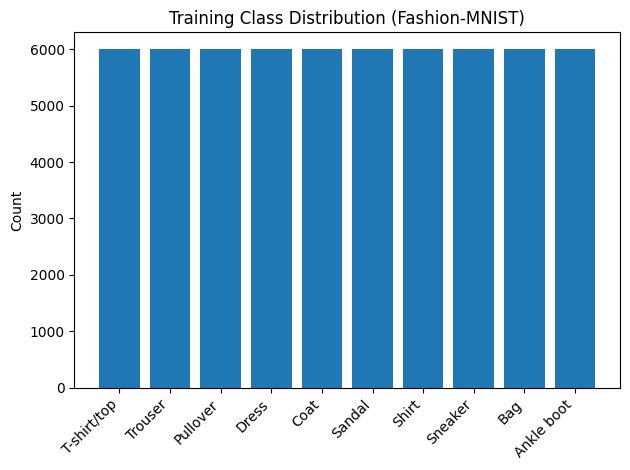

Counts per class: {'T-shirt/top': np.int64(6000), 'Trouser': np.int64(6000), 'Pullover': np.int64(6000), 'Dress': np.int64(6000), 'Coat': np.int64(6000), 'Sandal': np.int64(6000), 'Shirt': np.int64(6000), 'Sneaker': np.int64(6000), 'Bag': np.int64(6000), 'Ankle boot': np.int64(6000)}


In [13]:
# Plot class distribution in the training set
counts = np.bincount(y_train, minlength=10)

fig, ax = plt.subplots()
ax.bar(range(10), counts)
ax.set_xticks(range(10))
ax.set_xticklabels(CLASS_NAMES, rotation=45, ha="right")
ax.set_title("Training Class Distribution (Fashion-MNIST)")
ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

print("Counts per class:", dict(zip(CLASS_NAMES, counts)))


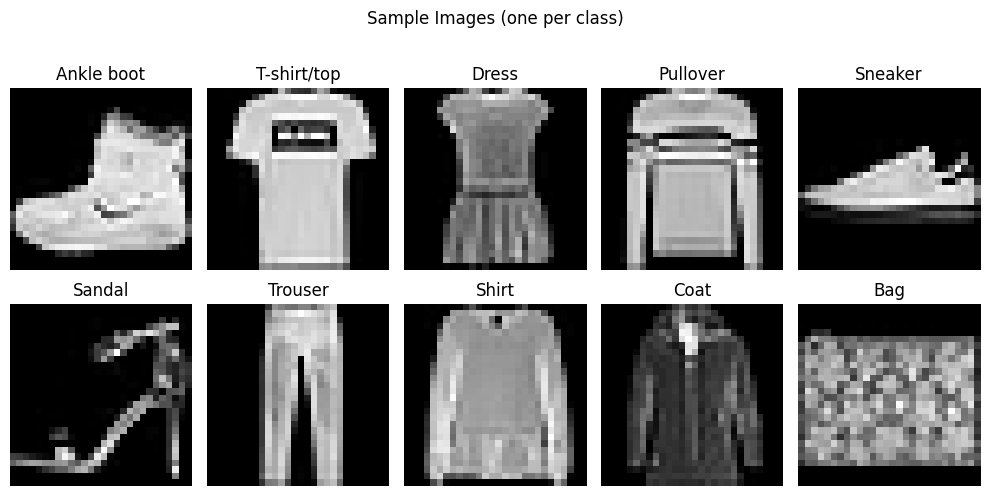

In [15]:
# EDA: Display one sample image per class
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

shown = set()
idx = 0

(x_raw, y_raw), _ = keras.datasets.fashion_mnist.load_data()
for img, label in zip(x_raw, y_raw):
    if label not in shown:
        axes[idx].imshow(img, cmap="gray")
        axes[idx].set_title(CLASS_NAMES[label])
        axes[idx].axis("off")
        shown.add(label)
        idx += 1
        if idx == 10:
            break

plt.suptitle("Sample Images (one per class)", y=1.02, fontsize=12)
plt.tight_layout()
plt.show()


## Observation:


  **the class distribution** is well-balanced, with roughly **6,000 samples per class** in the training set.  
- **Distinct visual patterns** are observable across classes — for instance, *Trousers* appear elongated, while *Sneakers* display unique contours and textures.  
This balance supports fair and unbiased model training.

In [ ]:
#Model Implementation — Two templates (shallow & deep) and three activations (ReLU, Sigmoid, Tanh)
def build_model(
    arch: str,
    activation: str,
    use_dropout: bool = False,
    use_batchnorm: bool = False,
) -> models.Sequential:
    """Builds a shallow or deep MLP model with optional dropout and batch normalization."""
    units, depth = (64, 2) if arch == "shallow" else (128, 4)

    model = models.Sequential([layers.Input(shape=(784,))])

    for _ in range(depth):
        model.add(layers.Dense(units))
        if use_batchnorm:
            model.add(layers.BatchNormalization())
        model.add(layers.Activation(activation))
        if use_dropout:
            model.add(layers.Dropout(0.3))

    model.add(layers.Dense(10, activation="softmax"))
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


# Register models with various architectures and activations
model_registry = {}

for arch in ("shallow", "deep"):
    for act in ("relu", "sigmoid", "tanh"):
        name = f"{arch}_{act}"
        model_registry[name] = build_model(
            arch,
            act,
            use_dropout=True,
            use_batchnorm=True,
        )
        print(f"Created model: {name}")


Created model: shallow_relu
Created model: shallow_sigmoid
Created model: shallow_tanh
Created model: deep_relu
Created model: deep_sigmoid
Created model: deep_tanh


In [ ]:
# Train and record performance history for each model
histories = {}  # Initialize the histories dictionary
for model_name, model in model_registry.items():
    print(f"Training {model_name}...")

    history = model.fit(
        x_train,
        y_train,
        epochs=5,
        batch_size=32,
        validation_split=0.2,
        verbose=1,
    )

    histories[model_name] = history.history
    print(f"Finished training {model_name}")

Training shallow_relu...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6909 - loss: 0.9174 - val_accuracy: 0.8378 - val_loss: 0.4388
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8110 - loss: 0.5388 - val_accuracy: 0.8581 - val_loss: 0.3951
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8285 - loss: 0.4884 - val_accuracy: 0.8527 - val_loss: 0.4022
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8373 - loss: 0.4595 - val_accuracy: 0.8665 - val_loss: 0.3742
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8454 - loss: 0.4379 - val_accuracy: 0.8695 - val_loss: 0.3644
Finished training shallow_relu
Training shallow_sigmoid...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5911 - loss: 1.2739 - val_accuracy: 0.8301 - val_loss: 0.4926
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7860 - loss: 0.6375 - val_accuracy: 0.8342 - val_loss: 0.4535
Epoch 3/5
150

 ## Evaluation and Visualization

In [ ]:
# Evaluate each trained model on the test set
results = {}

for model_name, model in model_registry.items():
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    results[model_name] = {"test_loss": test_loss, "test_accuracy": test_accuracy}
    print(f"{model_name} — Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


shallow_relu — Test Accuracy: 0.8617, Test Loss: 0.3872
shallow_sigmoid — Test Accuracy: 0.8447, Test Loss: 0.4280
shallow_tanh — Test Accuracy: 0.8454, Test Loss: 0.4270
deep_relu — Test Accuracy: 0.8607, Test Loss: 0.3884
deep_sigmoid — Test Accuracy: 0.8465, Test Loss: 0.4459
deep_tanh — Test Accuracy: 0.8422, Test Loss: 0.4406


In [ ]:
# Function to plot accuracy and loss curves
def plot_metrics(histories: dict, model_name: str) -> None:
    """Plot training and validation accuracy/loss curves for a given model."""
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(histories[model_name]["accuracy"], label="Train")
    plt.plot(histories[model_name]["val_accuracy"], label="Validation")
    plt.title(f"{model_name}: Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(histories[model_name]["loss"], label="Train")
    plt.plot(histories[model_name]["val_loss"], label="Validation")
    plt.title(f"{model_name}: Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


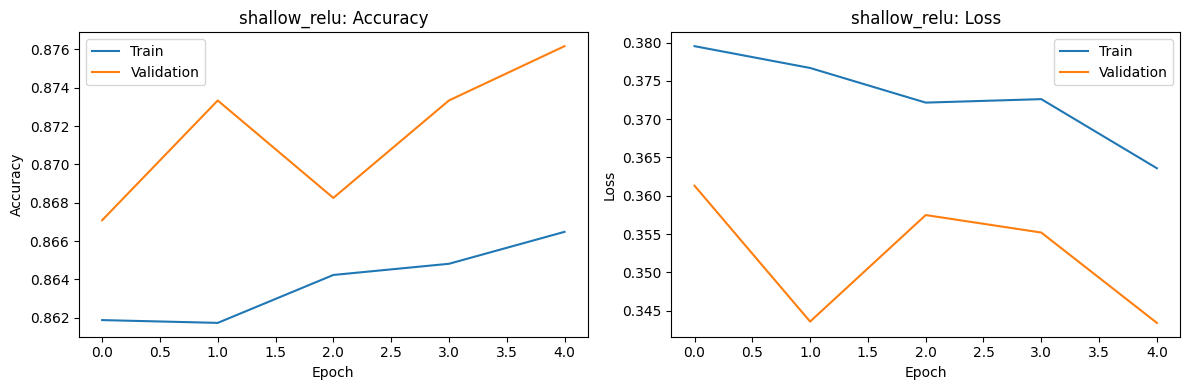

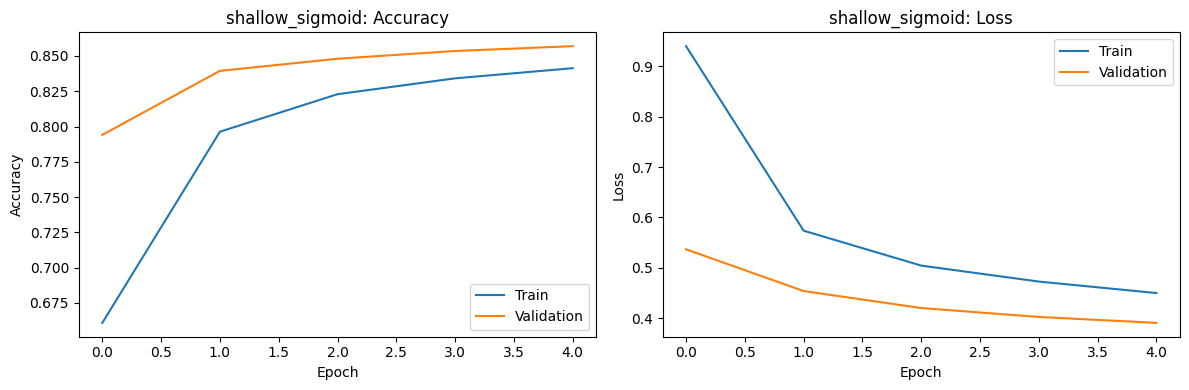

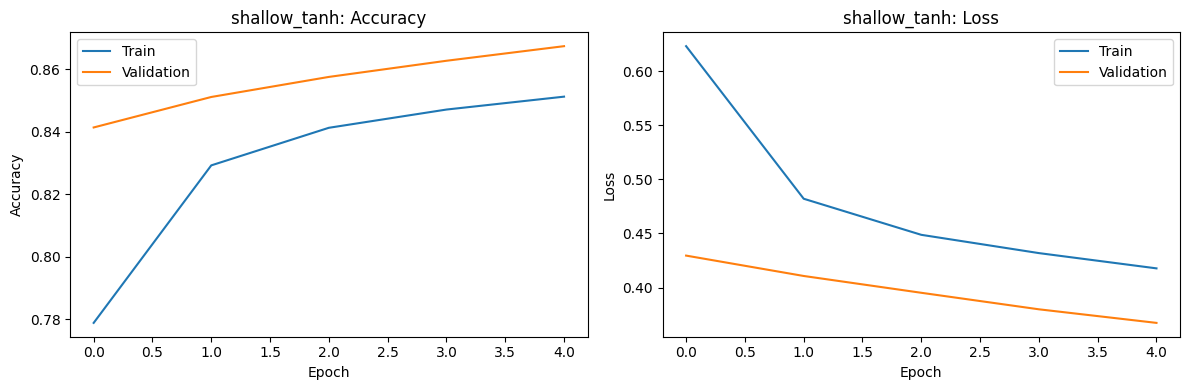

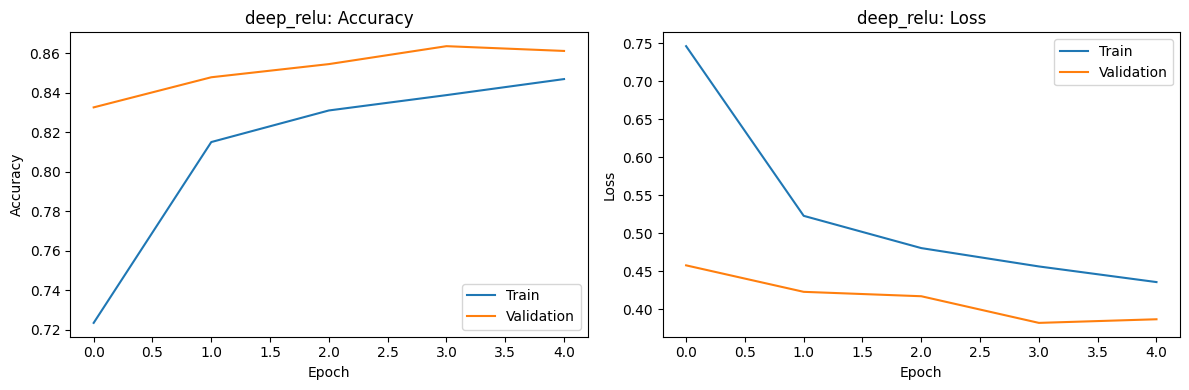

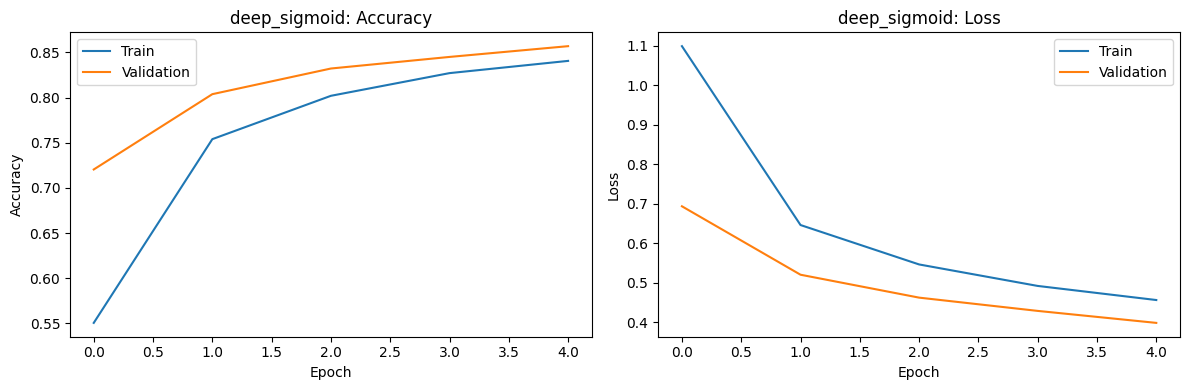

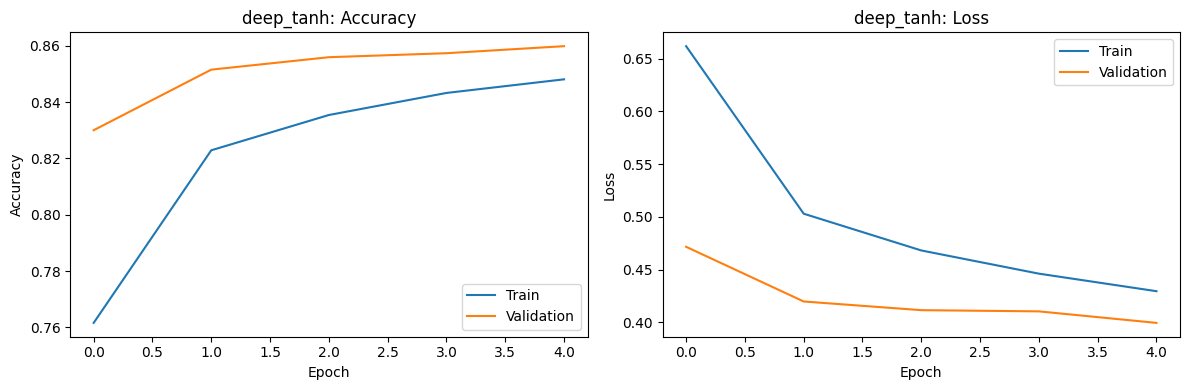

In [ ]:
# Plot accuracy and loss curves for all trained models
for model_name in model_registry.keys():
    plot_metrics(histories, model_name)


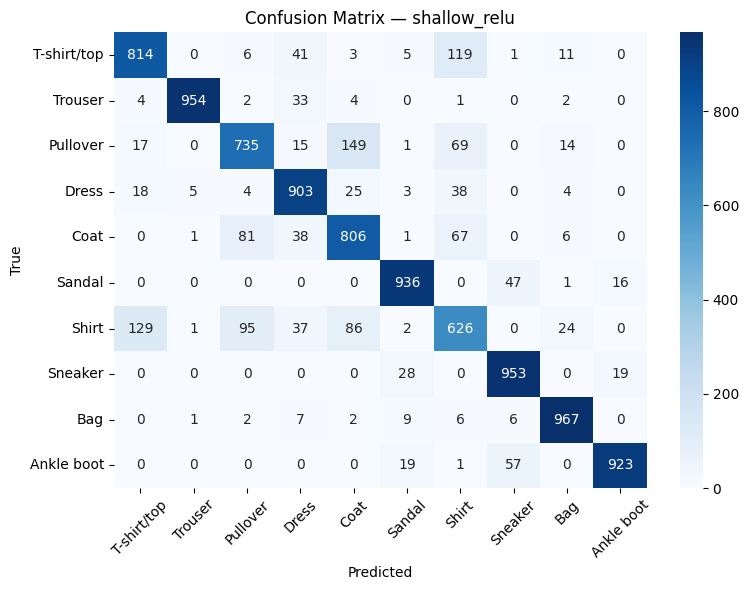


Classification Report — shallow_relu
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.81      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.79      0.73      0.76      1000
       Dress       0.84      0.90      0.87      1000
        Coat       0.75      0.81      0.78      1000
      Sandal       0.93      0.94      0.93      1000
       Shirt       0.68      0.63      0.65      1000
     Sneaker       0.90      0.95      0.92      1000
         Bag       0.94      0.97      0.95      1000
  Ankle boot       0.96      0.92      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



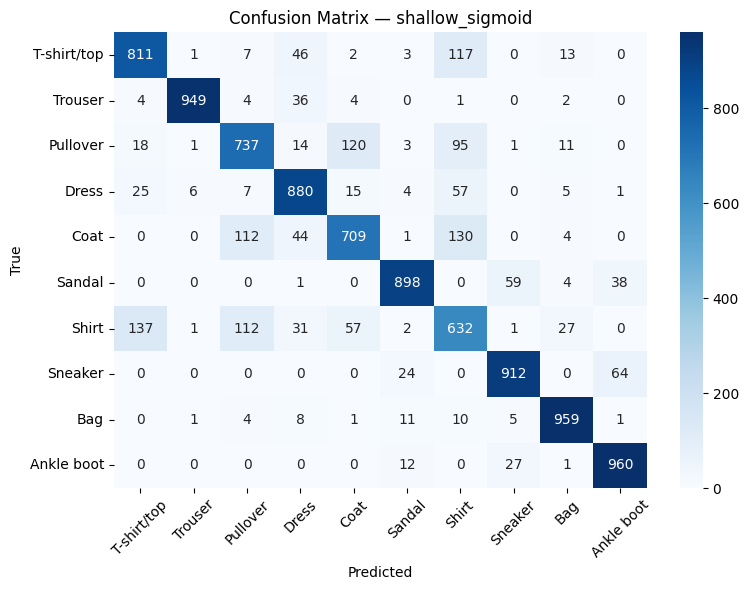


Classification Report — shallow_sigmoid
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.81      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.75      0.74      0.74      1000
       Dress       0.83      0.88      0.85      1000
        Coat       0.78      0.71      0.74      1000
      Sandal       0.94      0.90      0.92      1000
       Shirt       0.61      0.63      0.62      1000
     Sneaker       0.91      0.91      0.91      1000
         Bag       0.93      0.96      0.95      1000
  Ankle boot       0.90      0.96      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



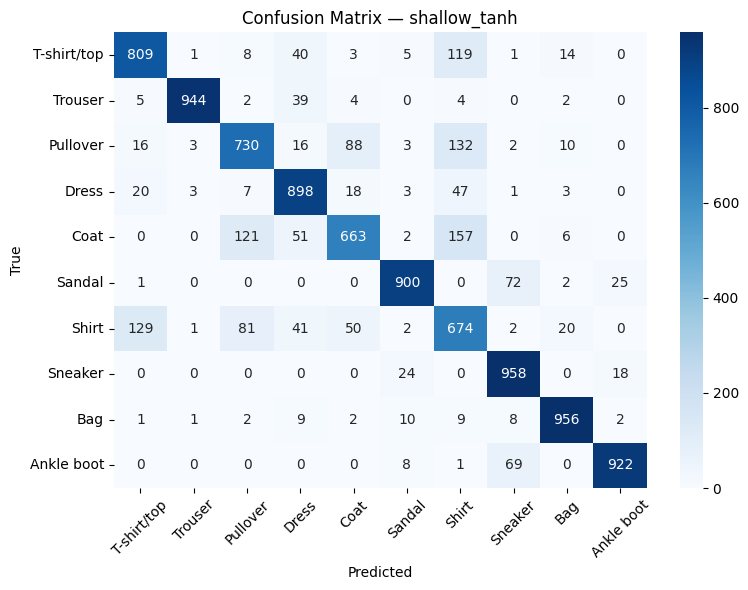


Classification Report — shallow_tanh
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.82      1000
     Trouser       0.99      0.94      0.97      1000
    Pullover       0.77      0.73      0.75      1000
       Dress       0.82      0.90      0.86      1000
        Coat       0.80      0.66      0.73      1000
      Sandal       0.94      0.90      0.92      1000
       Shirt       0.59      0.67      0.63      1000
     Sneaker       0.86      0.96      0.91      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.95      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



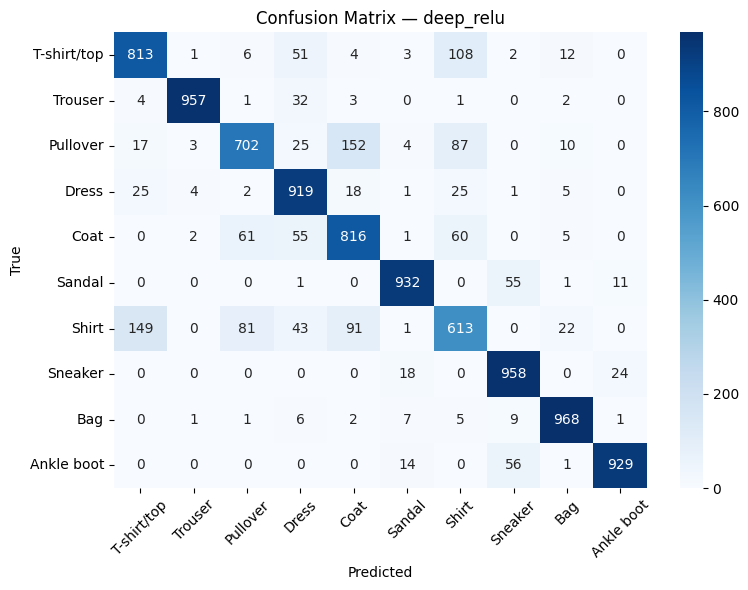


Classification Report — deep_relu
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.81      0.81      1000
     Trouser       0.99      0.96      0.97      1000
    Pullover       0.82      0.70      0.76      1000
       Dress       0.81      0.92      0.86      1000
        Coat       0.75      0.82      0.78      1000
      Sandal       0.95      0.93      0.94      1000
       Shirt       0.68      0.61      0.65      1000
     Sneaker       0.89      0.96      0.92      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.96      0.93      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



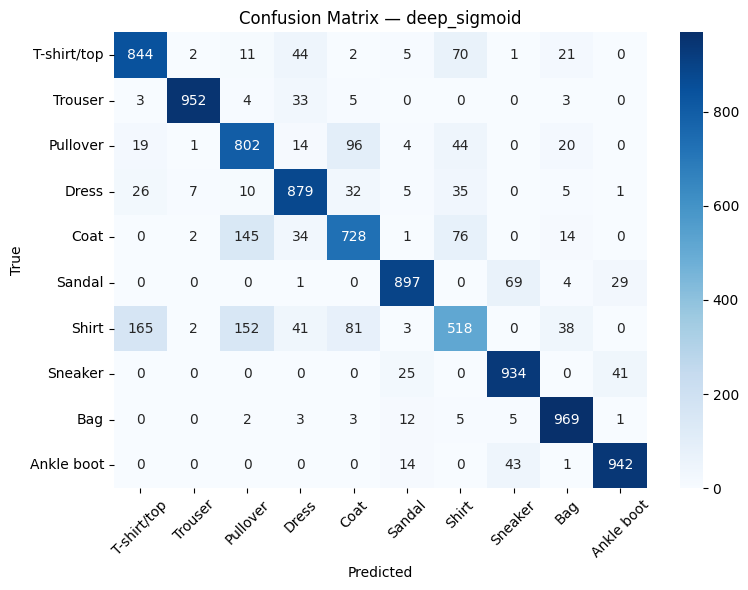


Classification Report — deep_sigmoid
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.84      0.82      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.71      0.80      0.75      1000
       Dress       0.84      0.88      0.86      1000
        Coat       0.77      0.73      0.75      1000
      Sandal       0.93      0.90      0.91      1000
       Shirt       0.69      0.52      0.59      1000
     Sneaker       0.89      0.93      0.91      1000
         Bag       0.90      0.97      0.93      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



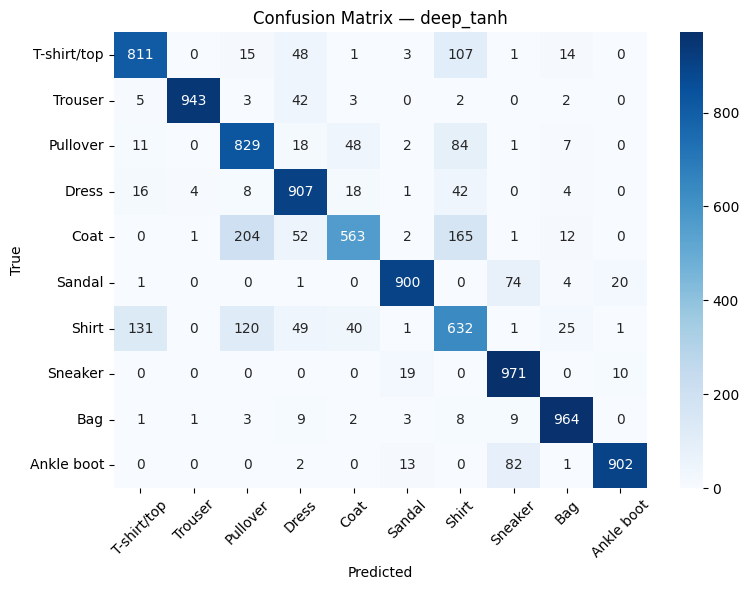


Classification Report — deep_tanh
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.81      0.82      1000
     Trouser       0.99      0.94      0.97      1000
    Pullover       0.70      0.83      0.76      1000
       Dress       0.80      0.91      0.85      1000
        Coat       0.83      0.56      0.67      1000
      Sandal       0.95      0.90      0.93      1000
       Shirt       0.61      0.63      0.62      1000
     Sneaker       0.85      0.97      0.91      1000
         Bag       0.93      0.96      0.95      1000
  Ankle boot       0.97      0.90      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



In [ ]:
# Generate confusion matrices and classification reports for each model
from sklearn.metrics import confusion_matrix, classification_report

for model_name, model in model_registry.items():
    y_pred = model.predict(x_test, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=CLASS_NAMES,
        yticklabels=CLASS_NAMES,
    )
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Classification report
    print(f"\nClassification Report — {model_name}")
    print(classification_report(y_test, y_pred_classes, target_names=CLASS_NAMES))

#Reflection
**1) Which architecture + activation performed better? Why might that be?**  


**2) What did the evaluation metrics (precision, recall, F1) tell you that accuracy did not?**  


**3) How would you improve your models next time?**  


**4) Ethical risks or limitations of image classification systems in this context:**  
